In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

DIR = '/network/home/zhangire/rl-learn/vae_results/'

In [2]:
def get_nums(line):
    tmp = line[11:]
    timestep = int(tmp.split(',')[0])
    goals_acheived = int(tmp.split(',')[1][16:].split('/')[0])
    goals_total = int(tmp.split(',')[1][16:].split('/')[1])
    percentage = float(tmp.split(',')[2][12:].split('\n')[0])

    return (timestep, goals_acheived, goals_total, percentage)

In [3]:
all_files = []
for file in os.listdir(DIR):
    if file.startswith("infer_"):
        file_name = open(DIR+file, 'r')
        lines = file_name.readlines()
        if len(lines) < 10: #check files are not empty
            print (str(file))
            continue
        all_files.append(file)

In [4]:
xs_rs = [64,
 3264,
 6464,
 9664,
 12864,
 16064,
 19264,
 22464,
 25664,
 28864,
 32064,
 35264,
 38464,
 41664,
 44864,
 48064,
 51264,
 54464,
 57664,
 60864,
 64064,
 67264,
 70464,
 73664,
 76864,
 80064,
 83264,
 86464,
 89664,
 92864,
 96064,
 99264,
 102464,
 105664,
 108864,
 112064,
 115264,
 118464,
 121664,
 124864,
 128064,
 131264,
 134464,
 137664,
 140864,
 144064,
 147264,
 150464,
 153664,
 156864,
 160064,
 163264,
 166464,
 169664,
 172864,
 176064,
 179264,
 182464,
 185664,
 188864,
 192064,
 195264,
 198464,
 201664,
 204864,
 208064,
 211264,
 214464,
 217664,
 220864,
 224064,
 227264,
 230464,
 233664,
 236864,
 240064,
 243264,
 246464,
 249664,
 252864,
 256064,
 259264,
 262464,
 265664,
 268864,
 272064,
 275264,
 278464,
 281664,
 284864,
 288064,
 291264,
 294464,
 297664,
 300864,
 304064,
 307264,
 310464,
 313664,
 316864,
 320064,
 323264,
 326464,
 329664,
 332864,
 336064,
 339264,
 342464,
 345664,
 348864,
 352064,
 355264,
 358464,
 361664,
 364864,
 368064,
 371264,
 374464,
 377664,
 380864,
 384064,
 387264,
 390464,
 393664,
 396864,
 400064,
 403264,
 406464,
 409664,
 412864,
 416064,
 419264,
 422464,
 425664,
 428864,
 432064,
 435264,
 438464,
 441664,
 444864,
 448064,
 451264,
 454464,
 457664,
 460864,
 464064,
 467264,
 470464,
 473664,
 476864,
 480064,
 483264,
 486464,
 489664,
 492864,
 496064,
 499264]

In [5]:

xs = []
file = all_files[0]
file = open(DIR+file, 'r') 
lines = file.readlines()
if len(lines) == 110:
    lines = lines[4:]
print (len(lines))
lines = lines[:-27]
print (len(lines))
for l in lines:
    xs.append(get_nums(l)[0])
train_len = len(xs)

106
79


In [6]:
def get_goals(file):
    goals = [] 
    file = open(DIR+file, 'r') 
    lines = file.readlines()
    if len(lines) == 110:
        lines = lines[4:]
    lines = lines[:-27]
    for l in lines:
        goals.append(get_nums(l)[1])
    return goals
    

In [7]:
def compute_area(xs , ys , max_steps=500000.):
    area = 0
    x = [0]
    y = [0]
    for i in range(len(xs)):
        x.append(xs[i])
        y.append(ys[i])
        area += (y[-1] + y[-2])/2.0 * (x[-1] - x[-2])
        if x[-1] >= max_steps:
            break
    return (area / max_steps)

In [8]:
def get_mean_area(task, hyp):

    files = []

    for file in all_files:
        if file.startswith("infer_"+str(task)):
            if file.endswith(str(hyp)+"_seed_1.txt") or file.endswith(str(hyp)+"_seed_2.txt") or file.endswith(str(hyp)+"_seed_3.txt"):
                files.append(file)
    areas = []
    for file in files:
        goals = get_goals(file)
        areas.append(compute_area(xs, goals))

    return np.mean(areas)

# select hyper-parameter

In [9]:
print (get_mean_area(4, 1)+get_mean_area(6, 1)) # 2
print (get_mean_area(4, 0.1)+get_mean_area(6, 0.1)) # 3
print (get_mean_area(4, 0.01)+get_mean_area(6, 0.01)) # 1

5070.798940444443
4615.995036444445
5525.602844444444


# lambda = 0.01

In [10]:
def get_policy_acc(exp_id=4, hyp='1.0'):
    
    accuracy_files = []
    for file in os.listdir(DIR):
        if file.startswith("infer_"+str(exp_id)):
            if file.endswith(hyp+"_seed_1.txt") or file.endswith(hyp+"_seed_2.txt") or file.endswith(hyp+"_seed_3.txt"):
                file_name = open(DIR+file, 'r') 
                accuracy_files.append(file)
    
    accs = []
    for file in accuracy_files:
        file = open(DIR+file, 'r') 
        line = file.readlines()[-2][9:]
        accs.append(get_nums(line)[-2])
    accs = np.array(accs)
    
    accs2 = []
    for file in accuracy_files:
        file = open(DIR+file, 'r') 
        line = file.readlines()[-2][9:]
        accs2.append(get_nums(line)[-1])
    accs2 = np.array(accs2)
    
    return (np.mean(accs),np.mean(accs2))

In [11]:
def get_plot(exp_id=4, hyp='1.0', rs_hyp='1.0'):
    
    
    DIR = '/network/home/zhangire/rl-learn/vae_results/'
    accuracy_files = []
    for file in os.listdir(DIR):
        if file.startswith("infer_"+str(exp_id)):
            if file.endswith(hyp+"_seed_1.txt") or file.endswith(hyp+"_seed_2.txt") or file.endswith(hyp+"_seed_3.txt"):
                file_name = open(DIR+file, 'r') 
                accuracy_files.append(file)
                
    goals_runs = []

    for file in accuracy_files:
        goals = []
        file = open(DIR+file, 'r') 
        lines = file.readlines()
        if len(lines) == 110:
            lines = lines[4:]
        lines = lines[:-27]
        
        for l in lines:
            goals.append(get_nums(l)[1])
        goals_runs.append(goals)
    
    
    goals_runs = np.array(goals_runs)
    means = np.mean(goals_runs, axis=0)
    max_means = np.max(goals_runs, axis=0)
    min_means = np.min(goals_runs, axis=0)

    
    #rs
    
    accuracy_files = []
    DIR = '/network/home/zhangire/rl-learn/'
    for file in os.listdir(DIR):
        if file.startswith("infer_"+str(exp_id)):
            if file.endswith(rs_hyp+"_seed1.txt") or file.endswith(rs_hyp+"_seed2.txt") or file.endswith(rs_hyp+"_seed3.txt"):
                file_name = open(DIR+file, 'r') 
                accuracy_files.append(file)
                
    goals_runs = []

    for file in accuracy_files:
        goals = []
        file = open(DIR+file, 'r') 
        lines = file.readlines()[:-27]
        for l in lines:
            goals.append(get_nums(l)[1])
        goals_runs.append(goals)

    goals_runs = np.array(goals_runs)
    means_rs = np.mean(goals_runs, axis=0)
    max_means_rs = np.max(goals_runs, axis=0)
    min_means_rs = np.min(goals_runs, axis=0)
    
    #0
    accuracy_files = []
    DIR = '/network/home/zhangire/rl-learn/'
    for file in os.listdir(DIR):
        if file.startswith("infer_"+str(exp_id)):
            if file.endswith("0.0_seed1.txt") or file.endswith("0.0_seed2.txt") or file.endswith("0.0_seed3.txt"):
                file_name = open(DIR+file, 'r') 
                lines = file_name.readlines()
                if len(lines) < 10:
                    continue
                accuracy_files.append(file)
                
    goals_runs = []

    for file in accuracy_files:
        goals = []
        file = open(DIR+file, 'r') 
        lines = file.readlines()[:-19]
        for l in lines:
            goals.append(get_nums(l)[1])
        goals_runs.append(goals)
    
    goals_runs = np.array(goals_runs)
    means_0 = np.mean(goals_runs, axis=0)
    max_means_0 = np.max(goals_runs, axis=0)
    min_means_0 = np.min(goals_runs, axis=0)
    
    
    
    plt.fill_between(xs, min_means, max_means, color='green', alpha=.15)
    plt.plot(xs, means, color='green', label = 'Ext+Lang+State')
    
    plt.fill_between(xs_rs, min_means_rs, max_means_rs, color='orange', alpha=.15)
    plt.plot(xs_rs, means_rs, color='orange', label = 'Ext+Lang')
    
    plt.fill_between(xs_rs, min_means_0, max_means_0, color='blue', alpha=.15)
    plt.plot(xs_rs, means_0, color='blue', label = 'Ext')
    
    plt.title('Task %d' %(exp_id))
    plt.ylabel('Number of successful episodes')
    plt.xlabel('Number of time steps')
    plt.legend(loc="upper left")

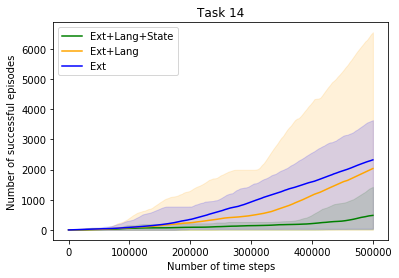

In [12]:
get_plot(exp_id=14, hyp='0.01', rs_hyp='0.01')

In [13]:
get_policy_acc(exp_id=14, hyp='0.01')

(12377.444444444445, 0.053045730584392776)